In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
df.shape

(205, 26)

In [47]:
#Checking whether there is any null values
df.isnull().sum()#0 indicates no null values

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [48]:
df.columns.values

array(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [49]:
df=df.drop(['CarName',],axis=1)
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [60]:
feature=['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg','price']

x=df[feature]
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [61]:
x.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [62]:
# stroke,compressionratio and peakrpm has too low correlation with price so they are removed 
x=x.drop(['stroke','compressionratio','peakrpm'],axis=1)
x


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,22470.0


In [63]:
#Spliting the independent features from the target feature
x=x.drop('price',axis=1)
y=df['price']#Target feature
x.shape


(205, 11)

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symboling   205 non-null    int64  
 1   wheelbase   205 non-null    float64
 2   carlength   205 non-null    float64
 3   carwidth    205 non-null    float64
 4   carheight   205 non-null    float64
 5   curbweight  205 non-null    int64  
 6   enginesize  205 non-null    int64  
 7   boreratio   205 non-null    float64
 8   horsepower  205 non-null    int64  
 9   citympg     205 non-null    int64  
 10  highwaympg  205 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 17.7 KB


In [65]:
#Spliting the data for training and testing. 20% of the data is used for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [68]:
## Building the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
## Training the Model
model.fit(x_train,y_train)

LinearRegression()

In [69]:
print("Coeff's: ",model.coef_)
print("Intercept: ",model.intercept_)

Coeff's:  [ 544.75865518  349.84260833 -885.32170369 1668.58812066  633.65513348
 1410.35389673 3007.89062646 -239.64897967 2505.86579007 -607.47379384
  830.90792752]
Intercept:  13304.787603658548


In [71]:
## Prediction
y_pred = model.predict(x_test)
print("Predicted values of testing data:\n",y_pred)

Predicted values of testing data:
 [ 6666.46267965 19728.87720731 14705.03093938   557.18911116
 11980.47966235 15214.09675804  6548.89651301  6741.1143653
 23483.61926625  7235.07393652 16443.10483382 37364.33074047
  8169.08641245 12674.12552463  5539.74639946 14867.56406653
 12698.3312938  19450.80679909  9549.74708499  6419.68471814
 11961.37836963 15218.02662204 12480.31891086 15308.85179087
 22833.93433298  6690.08843673  6682.82903042 15250.99064718
  6567.41355394  6307.49453129 10890.67010156 11308.84833555
 19923.54318522 11616.51578128  6440.15157726 26283.70451351
 11136.1989165  18183.0009168   5571.44358284 37839.16838834
  5883.37725367]


In [74]:
##model evaluation for testing set
##mean_square_error => sigma((ytest-ypred)^2))/2*m
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print("mean_square_error:",MSE)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE is:",rmse)

mean_square_error: 15614410.340809878
RMSE is: 3951.5073504689167


In [75]:
##acurracy score for training and testing data
test_score=model.score(x_test,y_test)
train_score=model.score(x_train,y_train)
print("Linear Regression testing score:",test_score)

Linear Regression testing score: 0.7983060596057016


# regularization

In [78]:
##Regularizing the model using Rigid Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100)
rr.fit(x_train, y_train)
##acurracy score for training and testing data
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
rr100=Ridge(alpha=500)
rr100.fit(x_train, y_train)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)

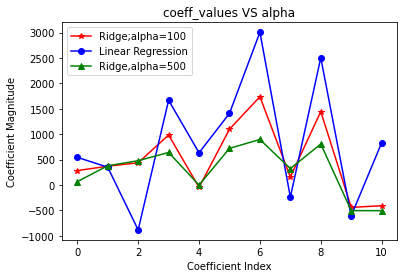

In [79]:
plt.plot(rr.coef_,marker='*',color='red',label=r'Ridge;alpha=100') 
plt.plot(model.coef_,marker='o',color='blue',label='Linear Regression')
plt.plot(rr100.coef_,marker='^',color='green',label=r'Ridge,alpha=500') 
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("coeff_values VS alpha")
plt.legend()
plt.show()